# Mapping and Visualization

Author: Nick Read 

---
In this notebook we will be mapping the path of hurricane Sandy along the east coast, and how urgent tweets following its landfall can give us an idea of hot spots in a disaster scenario. To do this we will be using Geopandas and Matplotlib to create a detailed and computationally lightweight solution. We will further animate this map to provide an easy to understand graphic to better aid rescue workers in identifying how major metro areas have been impacted.  

## Table of Contents
--- 
    
- [Import Packages](#import)
- [Data imports](#data)
    - [Hurricane data](#hur_data)
    - [Tweets data](#tweets_data)
- [Mapping](#Mapping)
    - [Map of East Coast](#Map_context)
    - [Map of Sandy Path](#Map_path)
- [Visualization of tweets](#gif)


### Import Packages
<a id="import"></a>

In [1]:
# These are some packages that might need to be installed
#!pip install missingno
#!pip install geopandas
#!pip install descartes

In [2]:
# Miscellaneous
import warnings
warnings.simplefilter(action='ignore')

# Load Visualization packages
import geopandas
import missingno          as msn
import seaborn            as sns
import matplotlib.pyplot  as plt
%matplotlib inline
from shapely.geometry     import Point

# Load additional packages
import numpy as np
import pandas as pd

### Data Import
<a id="data"></a>

This data was taken from flhurricane.com. Please click [here](http://flhurricane.com/) for further resources.

In [3]:
country = geopandas.read_file('../images/US_map/gz_2010_us_040_00_500k.json')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [4]:
# Checking the types of objects to make sure they are the correct format for geopandas
print(type(country))
print(type(country.geometry))
print(type(country.geometry[0]))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>


### Hurricane Data
<a id="hur_data"></a>

This data is taken from flhurricane.com and has stats including longitude, latitude and date recorded. 

In [5]:
sandy = pd.read_csv('http://flhurricane.com/cyclone/stormhistory.php?p=1&year=2012&storm=18')
sandy.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/22/2012 11:00,13.5,78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN,10/22/2012 10:50,Berg/avila
1,1A,10/22/2012 14:00,13.5,78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN,10/22/2012 13:41,Berg/avila
2,2,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,10/22/2012 16:59,Pasch
3,2,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,10/22/2012 16:59,Pasch
4,2A,10/22/2012 20:00,12.7,78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,10/22/2012 19:35,Stewart


In [6]:
# Dropping unneeded rows
sandy = sandy.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
sandy.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,10/22/2012 11:00,13.5,78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN
1,10/22/2012 14:00,13.5,78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN
2,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy
3,10/22/2012 17:00,12.5,78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy
4,10/22/2012 20:00,12.7,78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy


Converting the longitude provided by flhurricane.com from W to negative, which GeoPandas requires.<br>
A clear explanation of cardinal latitude and longitude vs. ordinal is provided [here](https://stackoverflow.com/questions/4536996/positive-negative-latitude-and-longitude-values-vs-cardinal-directions).

In [7]:
sandy['Long'] = 0 - sandy['Long']
sandy.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,10/22/2012 11:00,13.5,-78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN
1,10/22/2012 14:00,13.5,-78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN
2,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy
3,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy
4,10/22/2012 20:00,12.7,-78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy


We are going to organize the long and lat columns into one because it will be easier to read.

In [8]:
#Making coordinates column of Long and Lat.
sandy['coordinates'] = sandy[['Long', 'Lat']].values.tolist()
sandy.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/22/2012 11:00,13.5,-78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN,"[-78.0, 13.5]"
1,10/22/2012 14:00,13.5,-78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN,"[-78.5, 13.5]"
2,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,"[-78.5, 12.5]"
3,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,"[-78.5, 12.5]"
4,10/22/2012 20:00,12.7,-78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,"[-78.7, 12.7]"


In [9]:
# Making coordinates day a point to be used by matplot lib 
sandy['coordinates'] = sandy['coordinates'].apply(Point)
sandy.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,10/22/2012 11:00,13.5,-78.0,30,1003,SW at 5 MPH (230 deg),Tropical Depression,EIGHTEEN,POINT (-78 13.5)
1,10/22/2012 14:00,13.5,-78.5,30,1003,STATIONARY MINIMUM CENTRAL PRESSURE...1003 MB....,Tropical Depression,EIGHTEEN,POINT (-78.5 13.5)
2,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,POINT (-78.5 12.5)
3,10/22/2012 17:00,12.5,-78.5,40,999,STATIONARY MINIMUM CENTRAL PRESSURE...999 MB.....,Tropical Storm,Sandy,POINT (-78.5 12.5)
4,10/22/2012 20:00,12.7,-78.7,45,998,STATIONARY MINIMUM CENTRAL PRESSURE...998 MB.....,Tropical Storm,Sandy,POINT (-78.7 12.7)


We need to check for the last days of the hurricane in order to map the path and where it made landfall. We are unconcerned about where the hurricane started as it has not affected any one yet.

In [10]:
sandy = geopandas.GeoDataFrame(sandy, geometry='coordinates')
sandy = sandy.tail(30)

### Tweets Data
<a id="tweets_data"></a>

In [11]:
# Reading in the tweet data to get the timestamps and locations
df = pd.read_csv('../data/df_clean.csv')
df.head()

,id,location,text,timestamp,user,clean
0,59259141,Boston,Miles Davis to the rescue so,2012-11-11 23:52:07,diediesays,mile davis rescue
1,516097524,Boston,"@VINNYGUADAGNINO Happy birthday man , really l...",2012-11-11 23:06:45,abdallaxiv,happy birthday man really like effort help res...
2,17152345,Boston,How You Can Help Sandy's Victims http://bit.ly...,2012-11-11 22:15:20,02458,help sandy victim via
3,460583099,Boston,"When karma finally hits you in the face, ill b...",2012-11-11 19:37:42,andreap_426,karma finally hit face ill case need help
4,17246073,Boston,How You Can Help Sandy's Victims http://bit.ly...,2012-11-11 18:15:27,02461,help sandy victim via


In [12]:
# Reading in our counts of tweets data
df_city = pd.read_csv('../data/df_mapping.csv')

In [13]:
df_city.head()

,timestamp,Philadelphia,Providence,Long Beach,Washington DC,Boston,Richmond,Buffalo,New York City
2143,2012-10-27 00:04:07,1,0,0,0,0,0,0,0
2499,2012-10-27 00:09:27,1,0,0,0,0,0,0,0
3984,2012-10-27 00:10:29,1,0,0,0,0,0,0,0
3542,2012-10-27 00:11:59,1,0,0,1,0,0,0,0
2142,2012-10-27 00:18:58,1,0,0,1,0,0,0,0


## Mapping
<a id="Mapping"></a>

In [14]:
# Making a dict of cities and coordinates
city_dict = {'Boston':       (42.3601, -71.0589), 
             'Philadelphia': (39.9526, -75.1652), 
             'Providence':   (41.8240, -71.4128), 
             'Washington DC':(38.9072, -77.0369), 
             'Buffalo':      (42.8802, -78.8787),
             'Long Beach':   (40.5884, -73.6579),
             'Richmond':     (37.5407, -77.4360), 
             'New York City':(40.7128, -74.0060)}
city_list = list(city_dict.keys())

In [15]:
city_dict = [(42.3601, -71.0589), 
             (39.9526, -75.1652), 
             (41.8240, -71.4128), 
             (38.9072, -77.0369), 
             (42.8802, -78.8787),
             (40.5884, -73.6579),
             (37.5407, -77.4360), 
             (40.7128, -74.0060)]


In [16]:
# Make the "city" df of cities and coordinates
city = pd.DataFrame({'city':city_list,
                     'coords':city_dict})

We are now able to map these 8 points over the map we are going to create rather than generating a map based on the geo-locations for each tweet that we have collected. This is because we are only concerned with the major metropolitan areas and not with the specific locations where the tweets came from. 

In [17]:
city

,city,coords
0,Boston,"(42.3601, -71.0589)"
1,Philadelphia,"(39.9526, -75.1652)"
2,Providence,"(41.824, -71.4128)"
3,Washington DC,"(38.9072, -77.0369)"
4,Buffalo,"(42.8802, -78.8787)"
5,Long Beach,"(40.5884, -73.6579)"
6,Richmond,"(37.5407, -77.436)"
7,New York City,"(40.7128, -74.006)"


In [18]:
city['lon'] = [i[0] for i in city['coords']]
city['lat'] = [i[1] for i in city['coords']]

In [19]:
# zips the long and lat togeather and makes them a gnom
city['geom'] = [Point(xy) for xy in zip(city['lat'],city['lon'])]

### Plotting the City Points

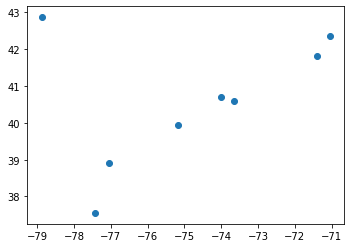

In [20]:
# Plot of where the cities are (no context yet)
city = geopandas.GeoDataFrame(city, geometry='geom');
city.plot();

**Observation**: We can see the locations of the cities but do not have a reference to place them on a map yet. We can check that the right elements have been populated by a quick visual count. 

### Plotting Hurricane Sandy

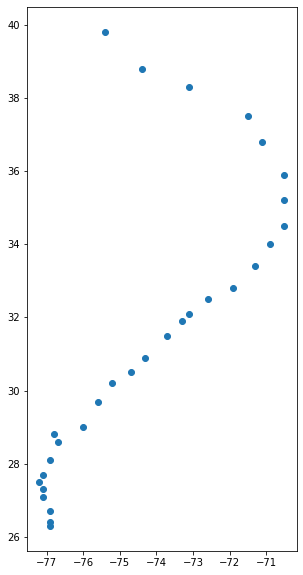

In [21]:
sandy.plot(figsize=(20,10));

**Observation**: From this we can see the path in 3 hr increments, but still do not yet have a map to plot this on. We can however check that these points make sense by looking at other maps of Sandy. 

In [22]:
place_list = ['Connecticut',
'Delaware',
'Florida',
'Georgia',
'Maine',
'Maryland',
'Massachusetts',
'New Hampshire',
'New Jersey',
'New York',
'North Carolina',
'Rhode Island',
'South Carolina',
'Virginia',
'Pennsylvania',
'Vermont']

### Map of East Coast
<a id="Map_context"></a>

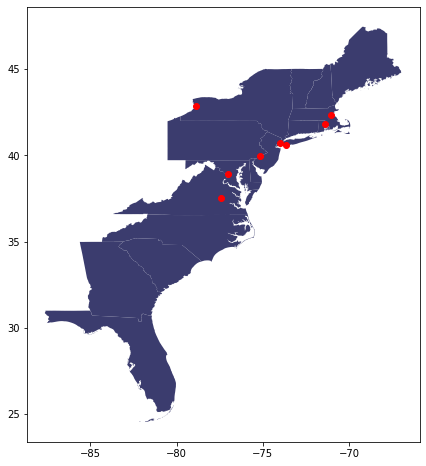

In [23]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(10,8))
base = country[country['NAME'].isin(place_list) == True].plot(ax=ax, color='#3B3C6E')
city.plot(ax = ax, color = 'red');

**Observation**: 
We can see that our cities are in the correct location and are matched correctly to the locations of the metro areas.

In [24]:
df_city.head()

,timestamp,Philadelphia,Providence,Long Beach,Washington DC,Boston,Richmond,Buffalo,New York City
2143,2012-10-27 00:04:07,1,0,0,0,0,0,0,0
2499,2012-10-27 00:09:27,1,0,0,0,0,0,0,0
3984,2012-10-27 00:10:29,1,0,0,0,0,0,0,0
3542,2012-10-27 00:11:59,1,0,0,1,0,0,0,0
2142,2012-10-27 00:18:58,1,0,0,1,0,0,0,0


In [25]:
# Convert timestamp to Datetime object
df_city['timestamp'] = pd.to_datetime(df_city['timestamp'])

In [26]:
sandy['size'] = (sandy['Wind'] - 60)*3

### Map of Sandy's Path
<a id="Map_path"></a>

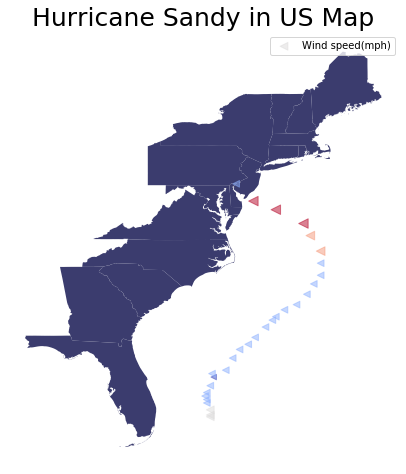

In [27]:
# Creates a polot of East cost wiht the sandy path
fig, ax = plt.subplots(1, figsize=(10,8))
# Shows makes the east coast states
base = country[country['NAME'].isin(place_list) == True].plot(ax=ax, color='#3B3C6E')
# Plosts the path of sandy 
sandy.plot(ax=base, column='Wind', alpha= 0.5, marker="<", markersize='size', cmap='coolwarm', label="Wind speed(mph)")
_ = ax.axis('off')
# makes a legend
plt.legend()
ax.set_title("Hurricane Sandy in US Map", fontsize=25)
plt.savefig('../images/US_map/Hurricane_footage.png',bbox_inches='tight');

**Observation**: Checking the path of hurricane. This is an accurate map of the hurricanes path along the east coast. 

In [28]:
df_city.head()

,timestamp,Philadelphia,Providence,Long Beach,Washington DC,Boston,Richmond,Buffalo,New York City
2143,2012-10-27 00:04:07,1,0,0,0,0,0,0,0
2499,2012-10-27 00:09:27,1,0,0,0,0,0,0,0
3984,2012-10-27 00:10:29,1,0,0,0,0,0,0,0
3542,2012-10-27 00:11:59,1,0,0,1,0,0,0,0
2142,2012-10-27 00:18:58,1,0,0,1,0,0,0,0


For the visualization process we need to keep the frame rate in mind to provide a smooth visual for our user. To achieve this we can make our time stamp count data into a 12 hr count. This should help make for a clear visual. 

In [29]:
# Combining the counts and city data into one data frame
city_concat = pd.concat([df_city,city])

In [30]:
# Resetting the index to be the date time object
sandy.reset_index(drop = True, inplace= True)

In [31]:
sandy['Date'] = pd.to_datetime(sandy['Date'])

In [32]:
# Making the timestamp the index 
df_city.index = df_city['timestamp']

In [33]:
# Group by 12 hr increments to help with frame rate issues when making visualizations. 
hourly_df = df_city.resample('12H').sum().cumsum()

In [34]:
hourly_df.head()

,Philadelphia,Providence,Long Beach,Washington DC,Boston,Richmond,Buffalo,New York City
timestamp,,,,,,,,
2012-10-27 00:00:00,157,51,232,138,77,0,27,0
2012-10-27 12:00:00,602,428,1301,1359,981,173,144,0
2012-10-28 00:00:00,1233,696,2147,2809,1621,488,281,0
2012-10-28 12:00:00,10006,3377,6037,12016,5737,2532,1230,0
2012-10-29 00:00:00,22688,6486,9878,21775,11526,4704,2886,0


We can now see that our counts will start after 12 hrs and make for a smoother, more pleasant to watch animation. 

In [35]:
# Checking the shape of our data frame to be able to make a gif run at the right frame rate
hourly_df.shape

(34, 8)

In [36]:
len(hourly_df)

34

In [37]:
# We can have a 64 frame rate gif which will be a good ratio for a smooth visualization 
len(sandy)+len(hourly_df)

64

## Visualization of tweets
<a id="gif"></a>

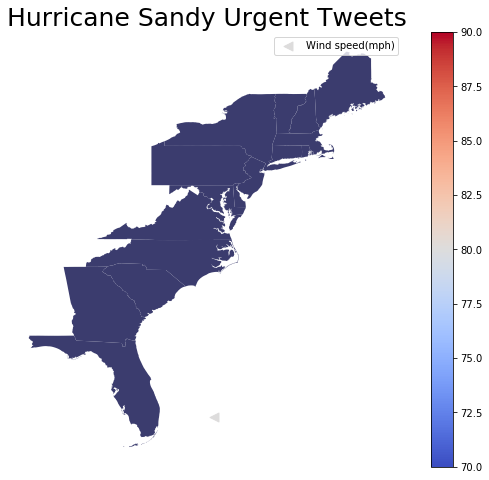

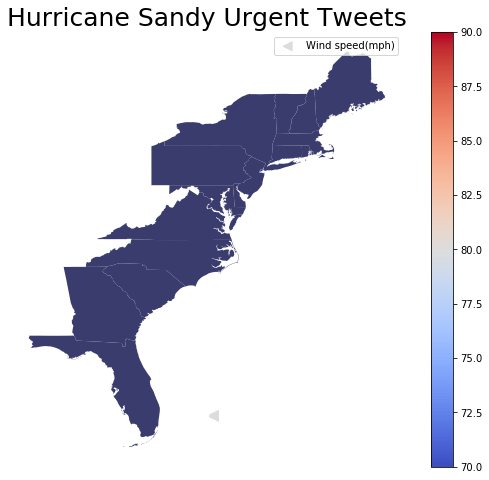

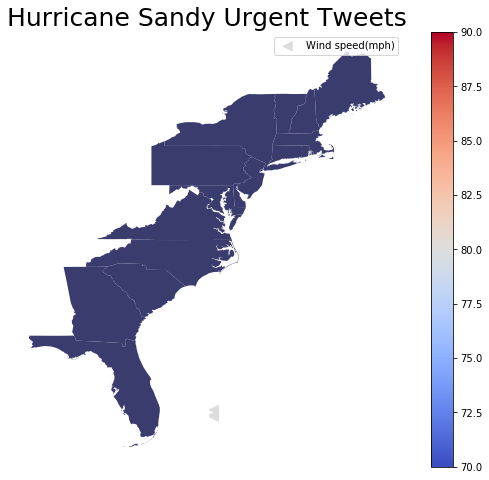

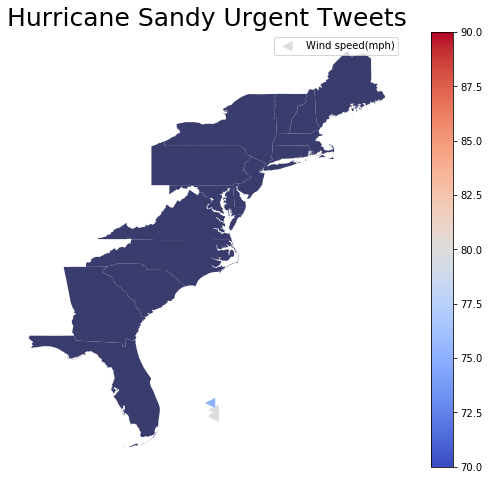

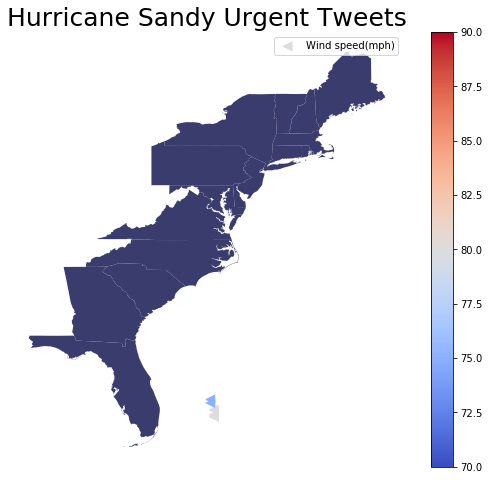

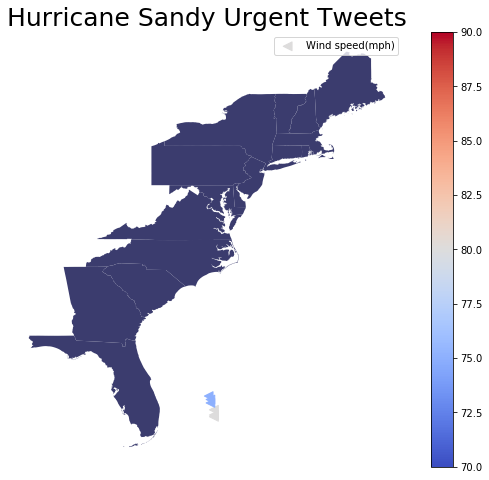

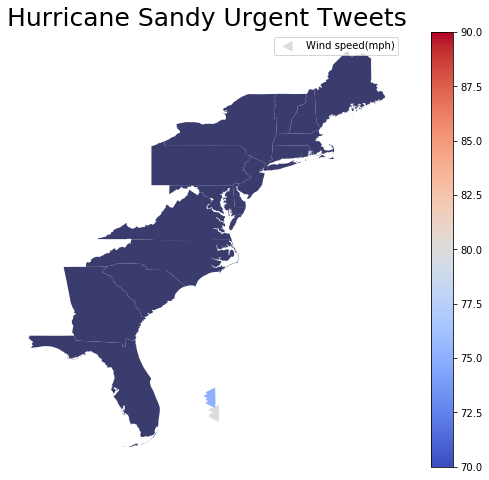

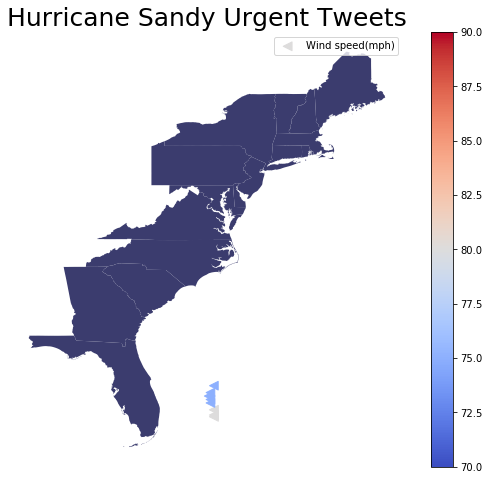

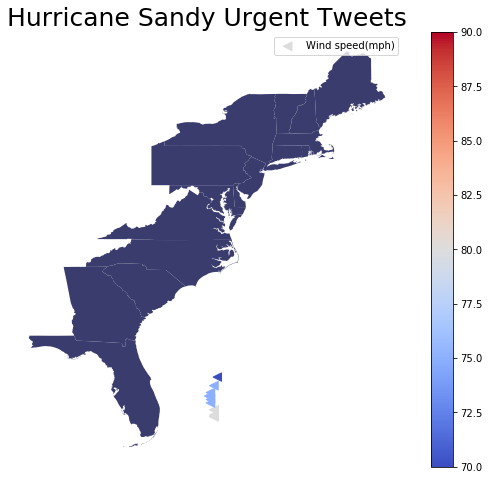

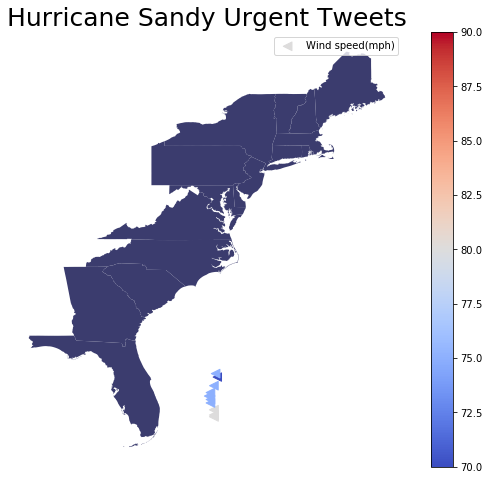

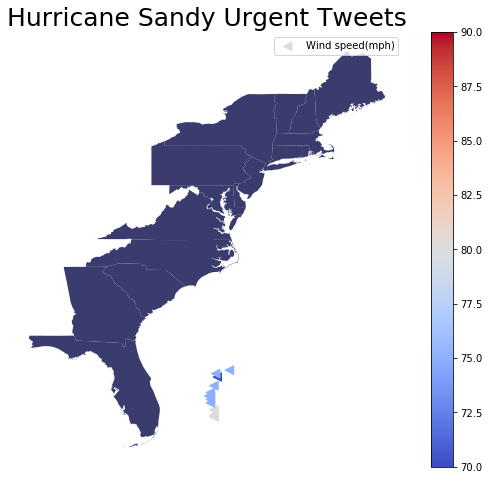

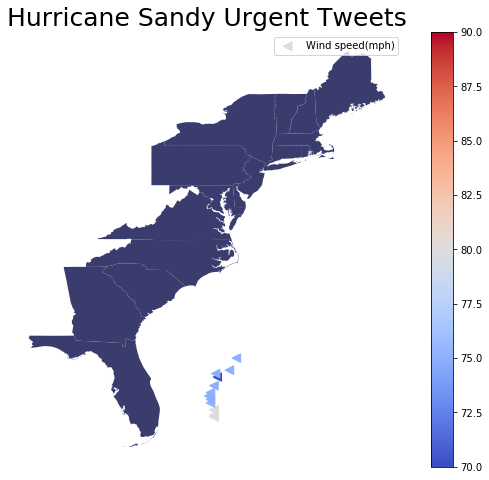

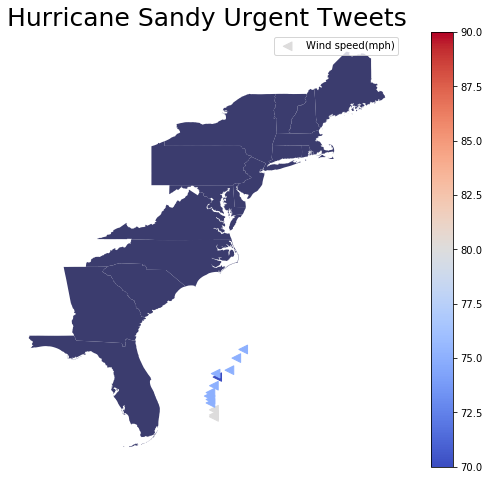

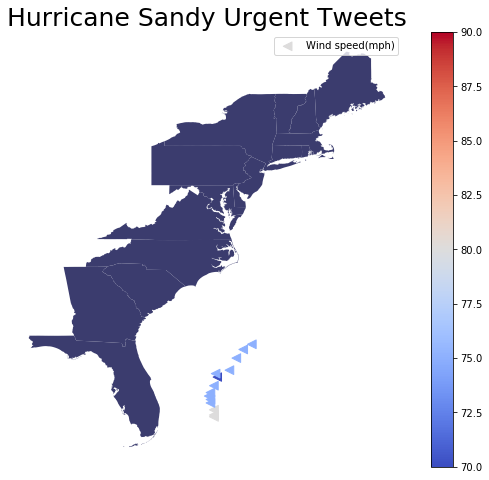

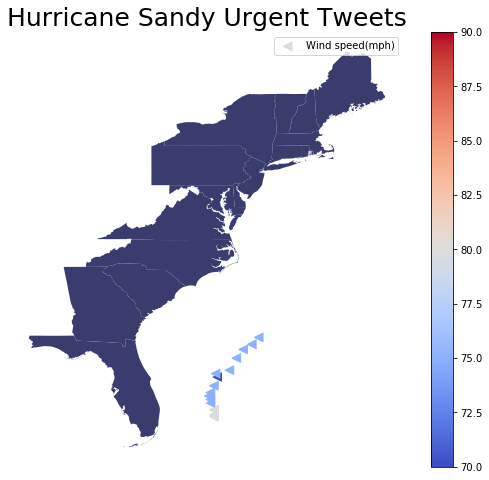

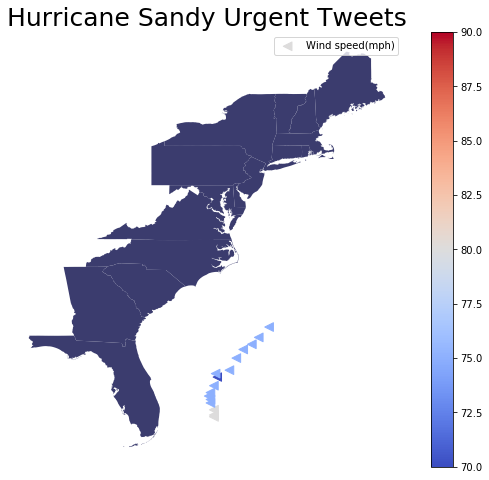

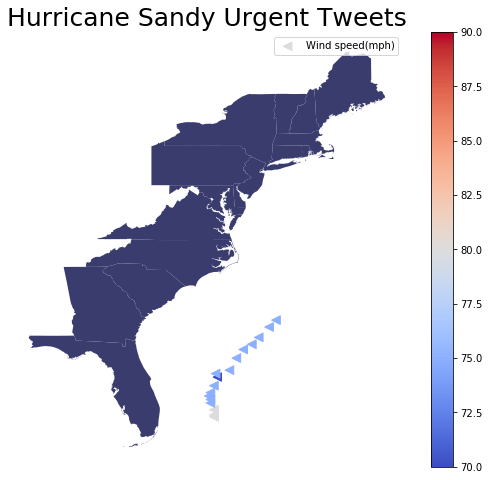

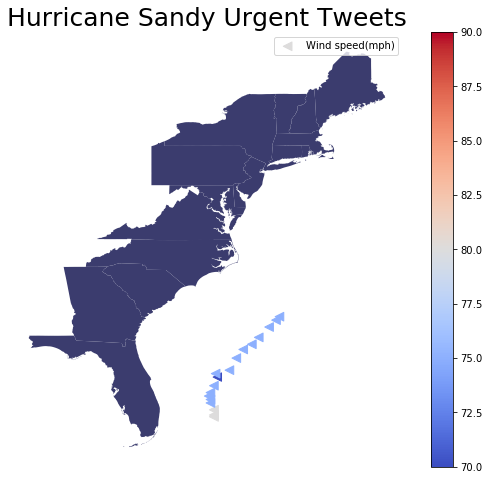

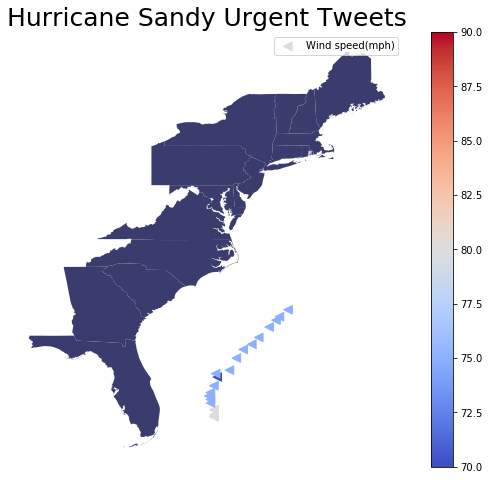

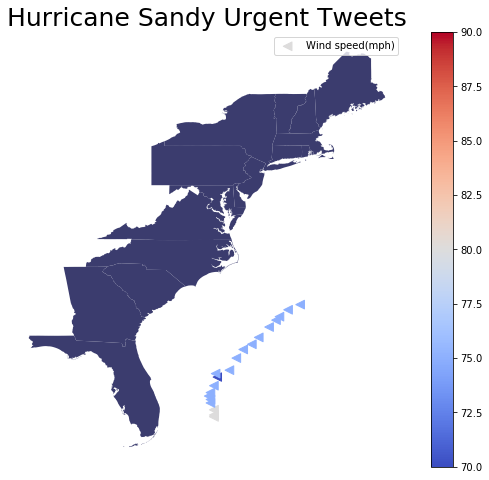

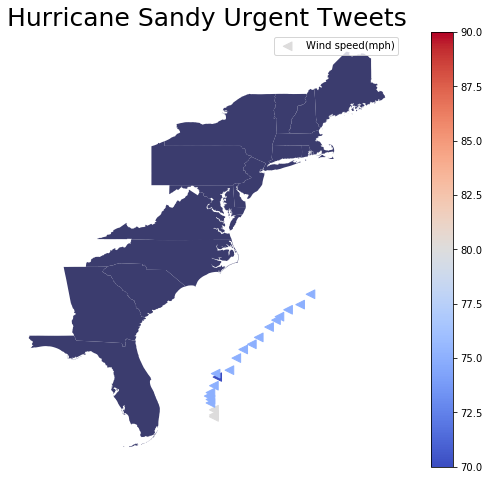

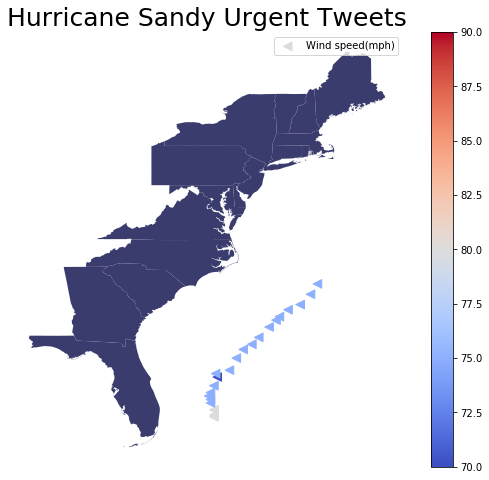

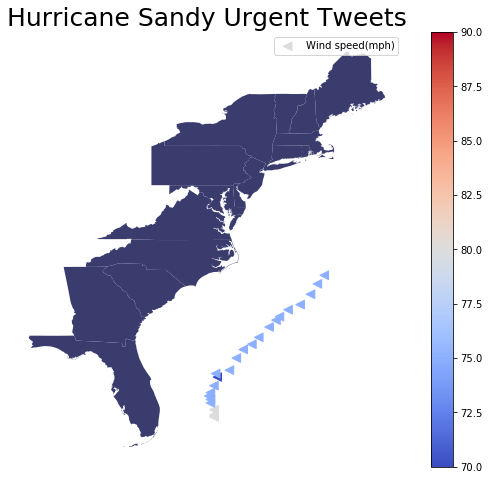

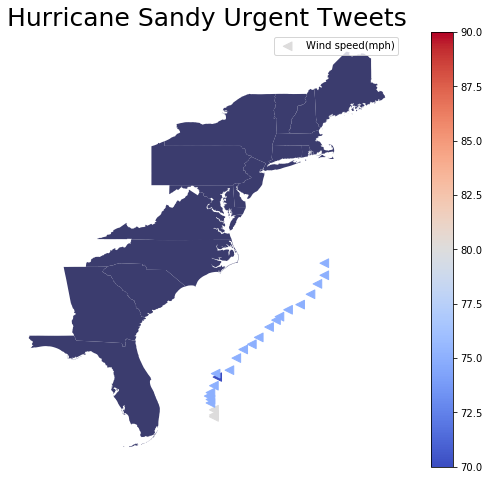

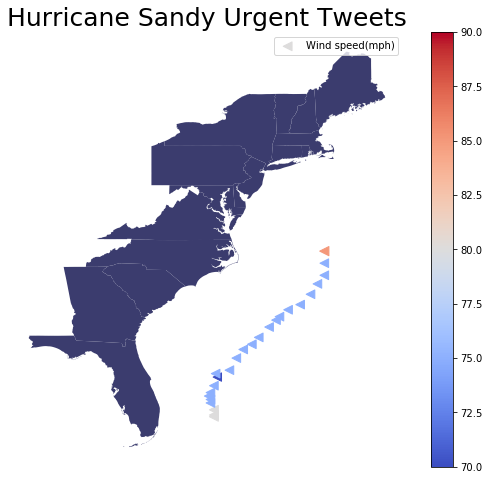

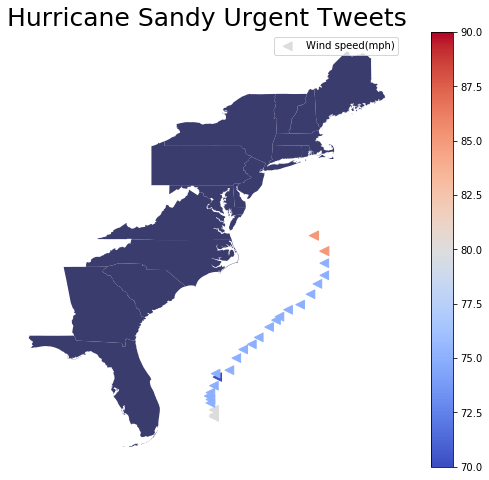

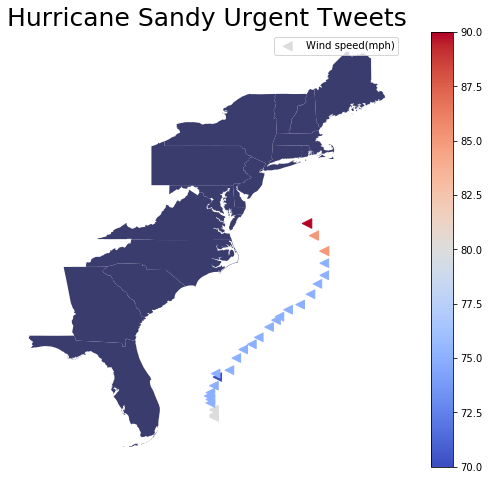

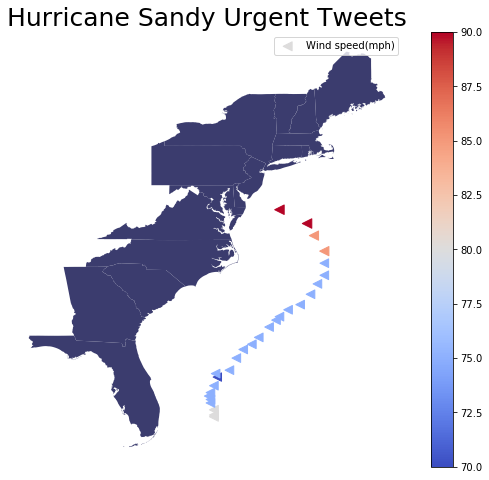

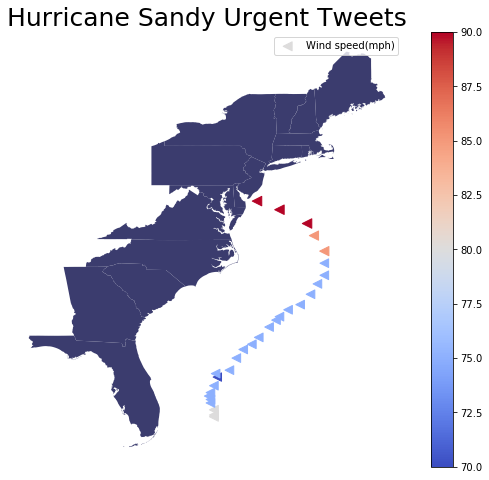

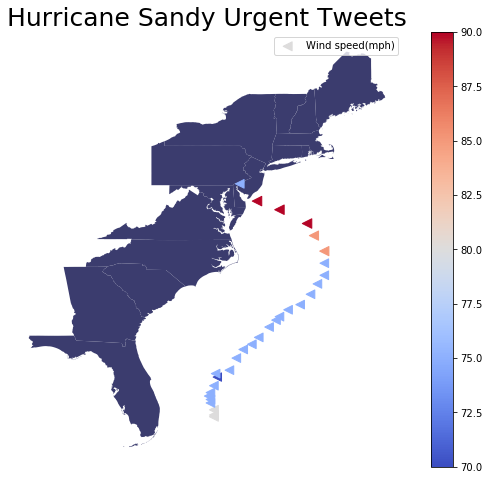

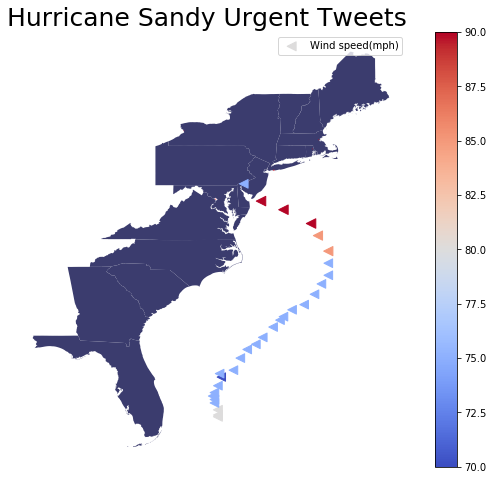

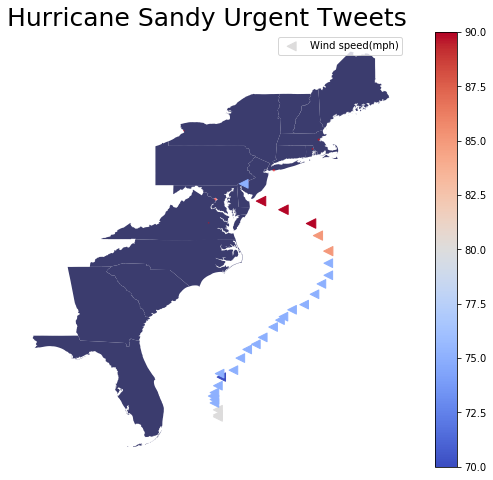

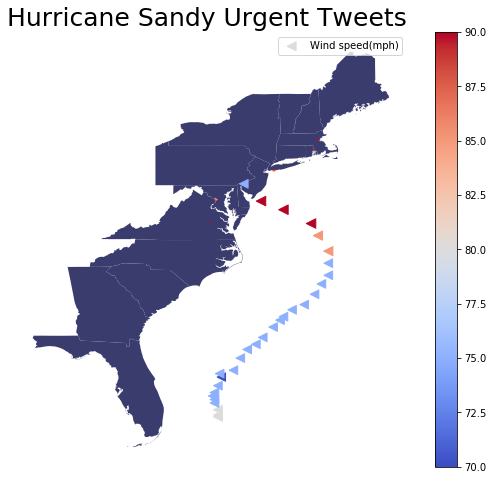

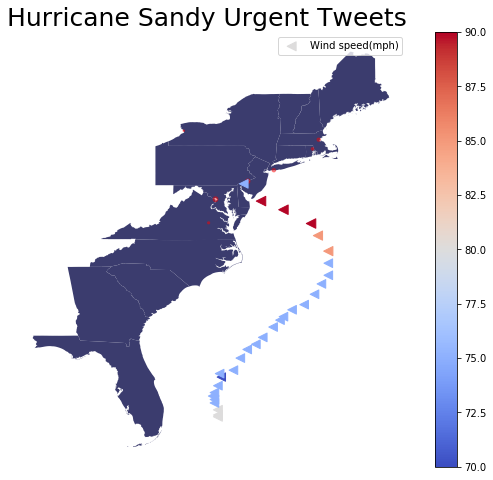

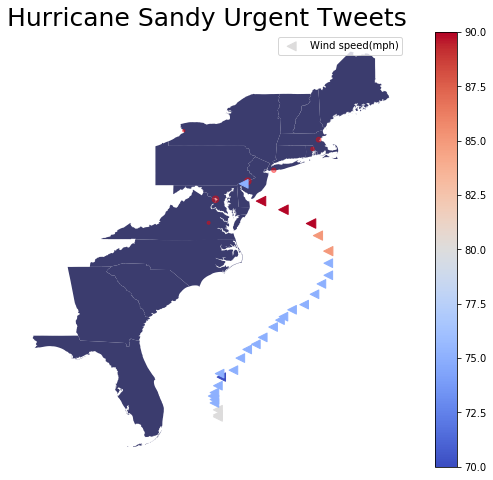

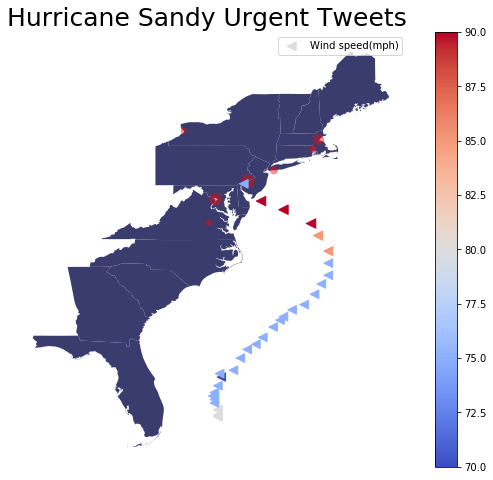

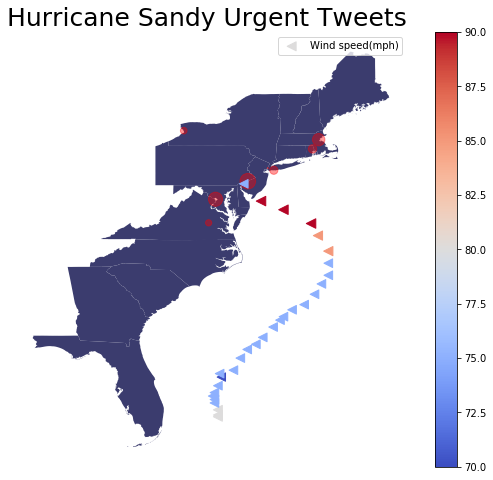

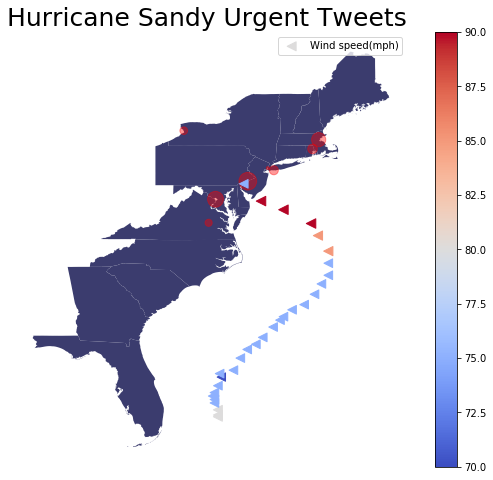

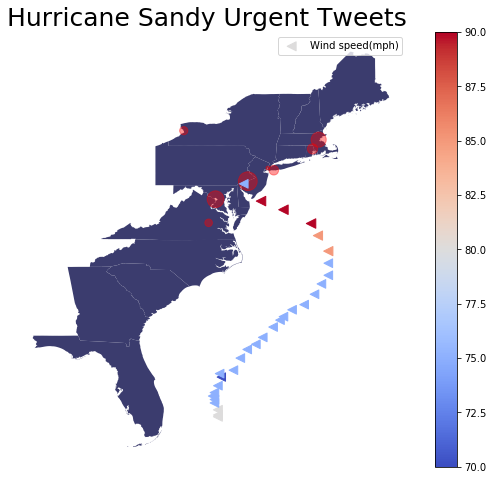

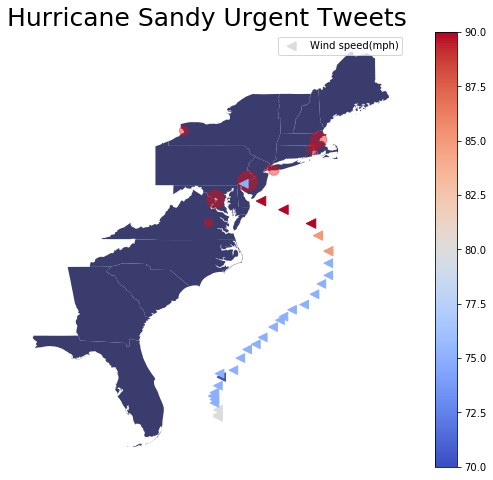

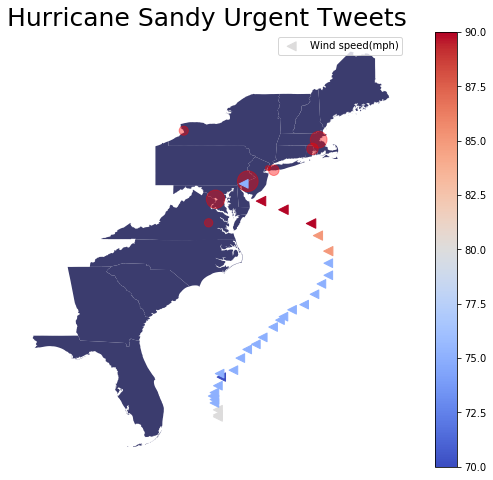

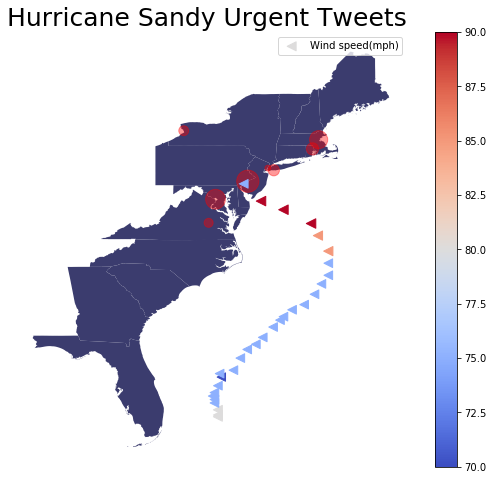

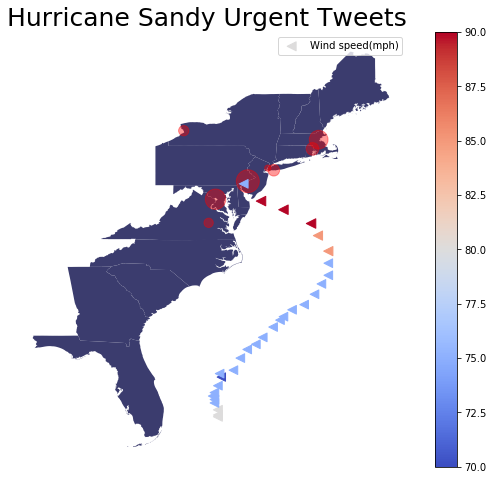

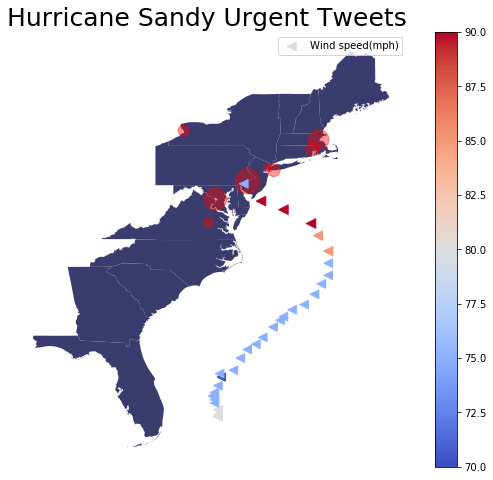

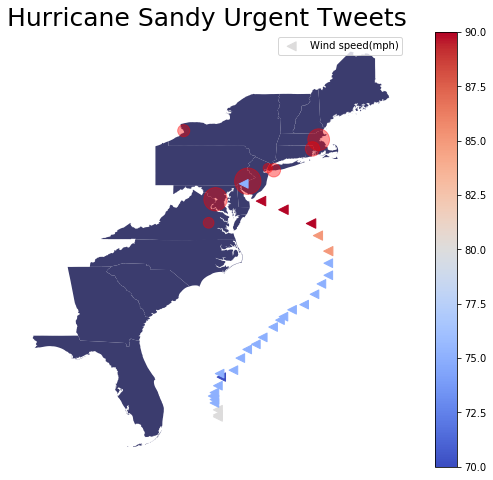

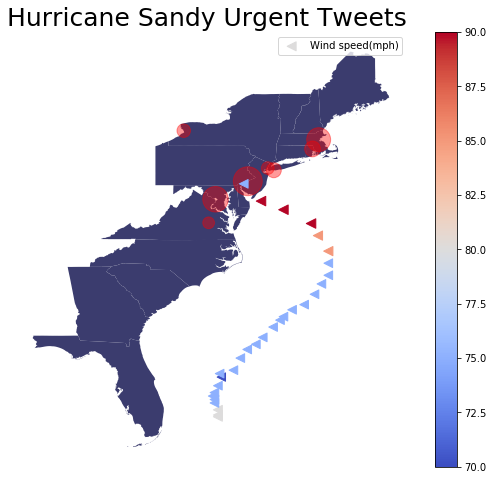

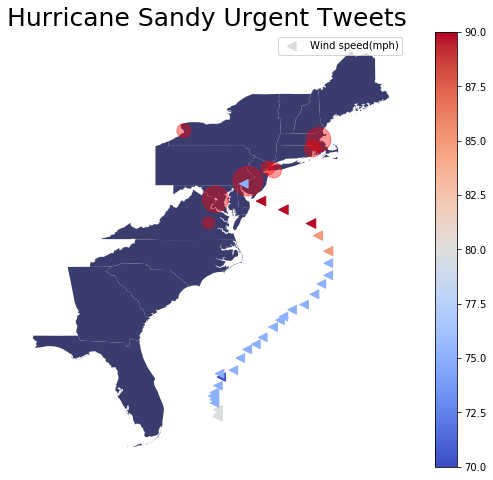

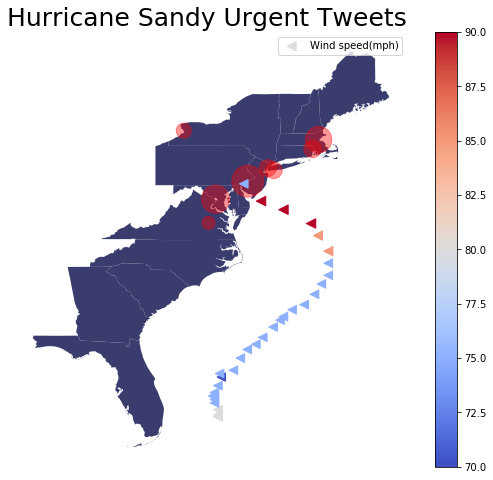

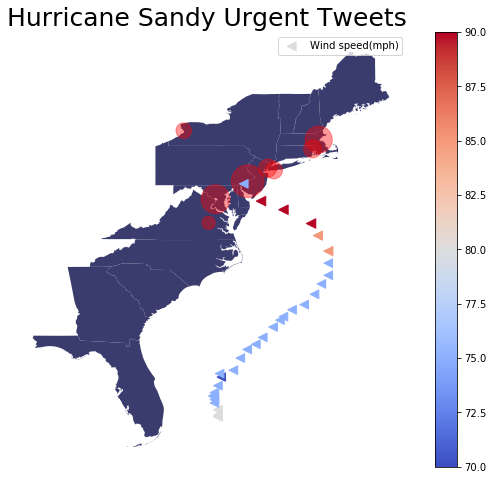

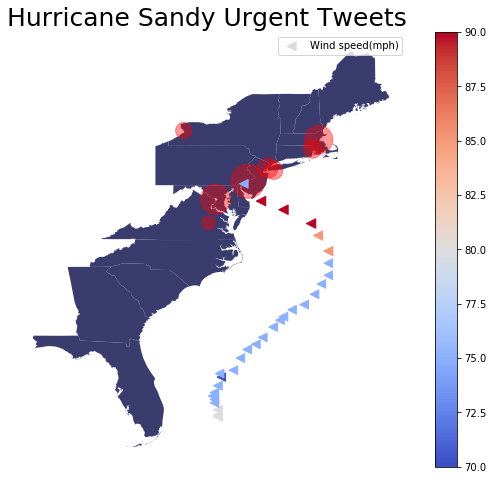

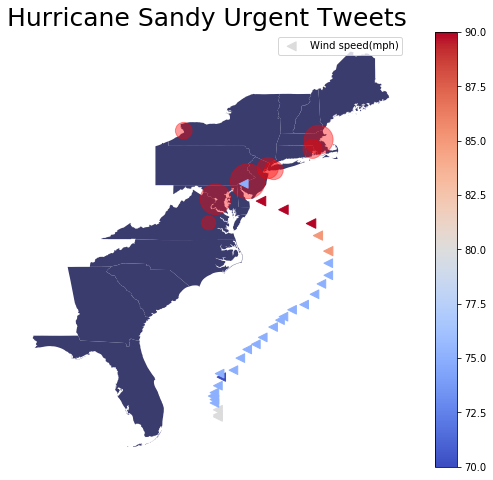

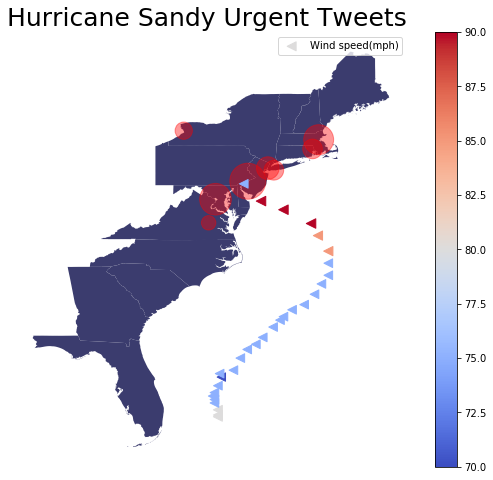

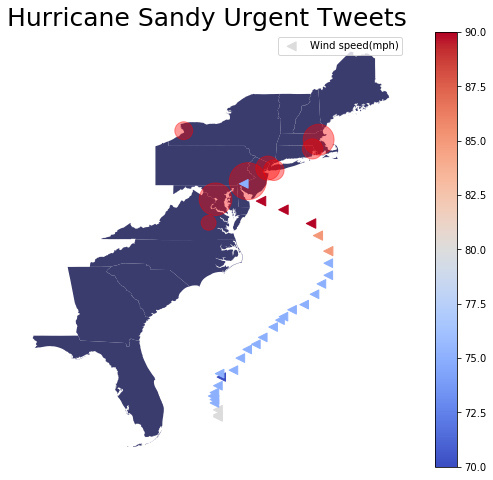

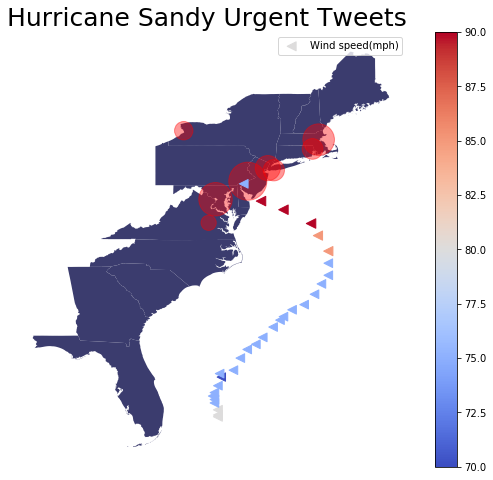

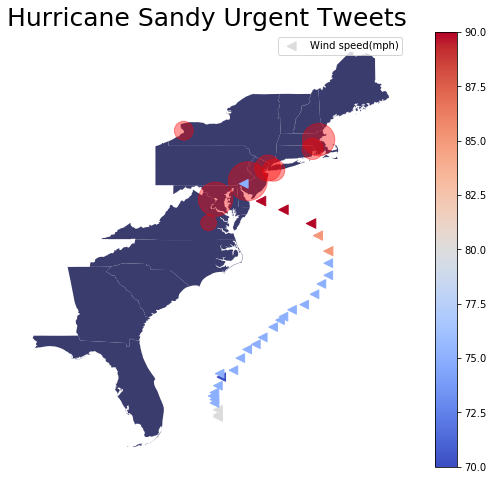

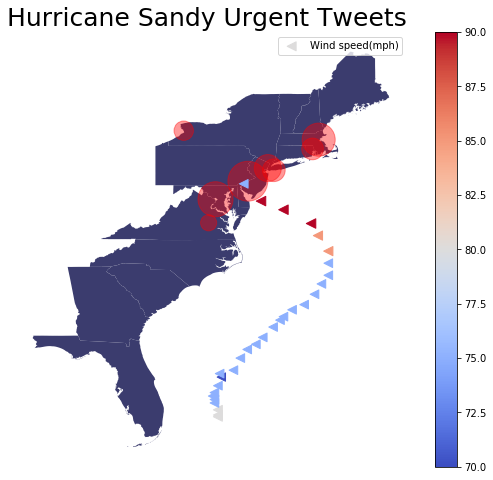

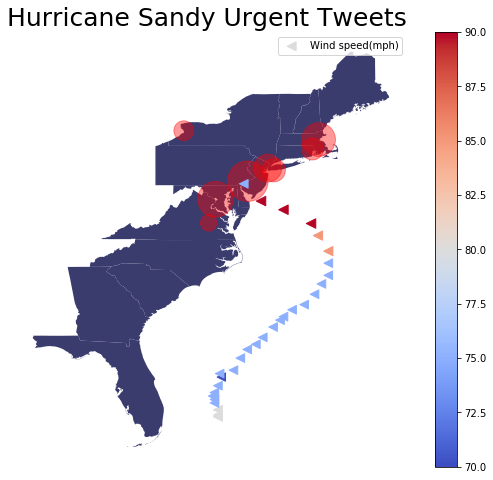

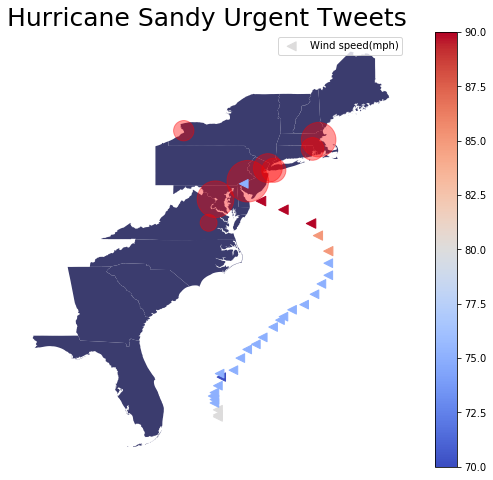

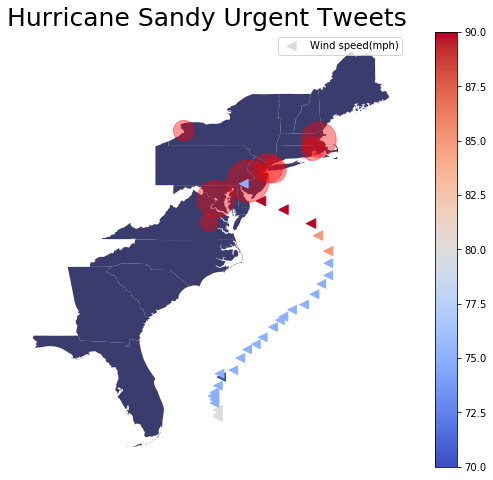

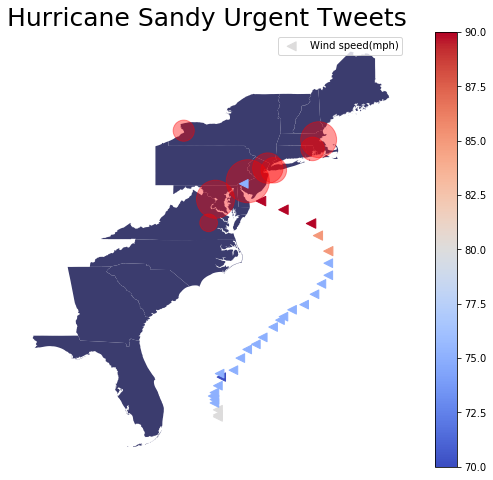

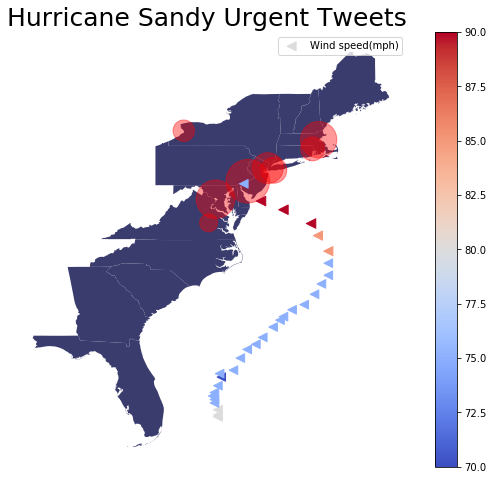

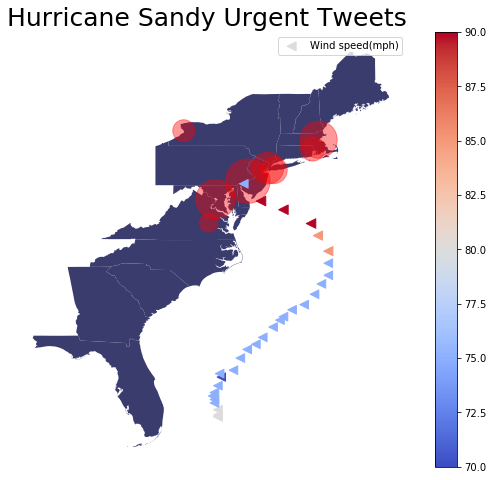

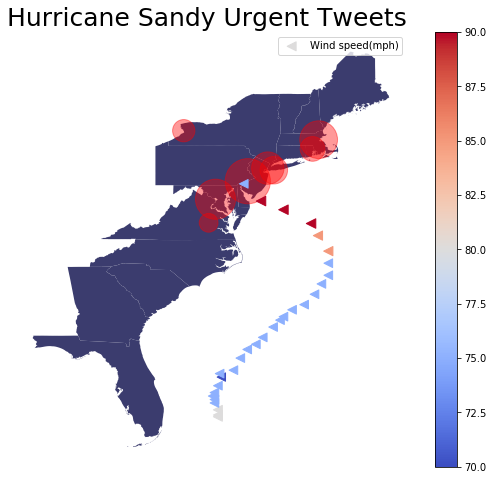

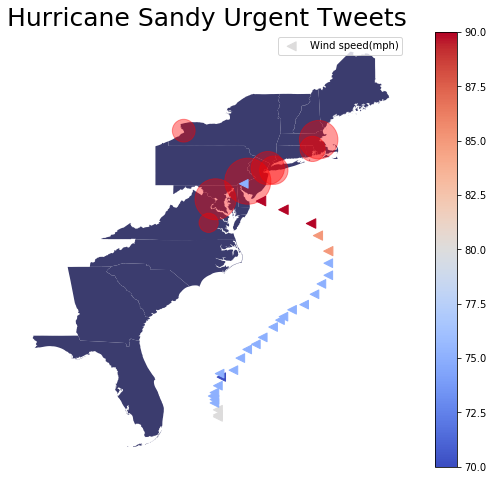

In [38]:
# For loop for ploting the track of the hurricane in each frame
j = 0
for i in sandy.index:
    fig, ax = plt.subplots(1, figsize=(10,8))
    base = country[country['NAME'].isin(place_list)].plot(ax=ax, color='#3B3C6E')
    # this takes the position of Sandy and plots the last location for each row 
    current_sandy = sandy.loc[:i,:]
    # creates the visualization of each row 
    current_sandy.plot(ax=base, column='Wind', marker="<",
                       markersize='Wind', cmap='coolwarm',
                       label="Wind speed(mph)", vmin=70, vmax=90, 
                       legend=True, norm=plt.Normalize(vmin=70, vmax=90))
    ax.axis('off')
    plt.legend()
    ax.set_title("Hurricane Sandy Urgent Tweets", fontsize=25);
    # outputs the individual files to be combined into a gif later
    file_name = (4-len(str(j)))*'0'+str(j)
    plt.savefig(f'../images/mapping_JPEG/{file_name}_map.png',bbox_inches='tight');
    j+=1
# After the above loop runs we can begin showing the counts of urgent tweets increase 
for i in hourly_df.index:
    fig, ax = plt.subplots(1, figsize=(10,8))
    base = country[country['NAME'].isin(place_list)].plot(ax=ax, color='#3B3C6E')
    # keeps the old position of circle in case there is not an increase in tweets in a 12 hr period
    current_hour = hourly_df.loc[i,:]
    
    city['size'] = [current_hour[i] for i in city['city']]
    # makes the size of the circles more easily viewed 
    city['size'] = city['size']/500
    
    city.plot(ax = ax, color = "red", markersize= 'size', alpha = .4 )
    
    current_sandy.plot(ax=base, column='Wind', marker="<",
                       markersize='Wind', cmap='coolwarm',
                       label="Wind speed(mph)", vmin=70, vmax=90, 
                       legend=True, norm=plt.Normalize(vmin=70, vmax=90))
    
    ax.axis('off')
    plt.legend()
    ax.set_title("Hurricane Sandy Urgent Tweets ", fontsize=25);
    file_name = (4-len(str(j)))*'0'+str(j)
    # saves the files to a new path
    plt.savefig(f'../images/mapping_JPEG/{file_name}_map.png',bbox_inches='tight')
    j+=1

In [39]:
# Creates a gif based on the 64 pngs that we generated above. 
import os
import imageio

png_dir = '../images/mapping_JPEG/'
images = []
dir_list = os.listdir(png_dir)
# sorts the images into 000->064
dir_list.sort()
# for loop to make the gif
for file_name in dir_list:
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('../images/map.gif', images, fps = 5)

**Observation**: 
We can see that urgent tweets are increasing after the hurricane hits, allowing us to map hot spot disaster areas affected by the storms. 